In [107]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
data_dir = "../"

# Function Invocations

This data visualizes the time overhead of the invocation of serverless functions. The overhead occurs because the RM receives the request, then has to forward it to the function and after receiving the result it is returned back to the client. This procedure is necessary to have an independent method of collecting the total execution time of a function. Measurements were done by deploying a function that sleeps for one second and then returns and measure the difference between the round trip times of direct invocations of the function or invocations through the RM. Following setups where tested:
- OpenFaaS (resource 2) with 1, 4, 12, 48, 96 and 384 concurrent invocations
- EC2 (resource 12) with 1, 4, 12, 48, 96 and 384 concurrent invocations
- Lambda (resource 14) with 1, 4, 10 concurrent invocations (the aws academy account is getting banned with higher concurrency)			

The original data can be found in [reaction_time](../function_invocation)

In [108]:
fi_rtt = []
fi_dir = os.path.join(data_dir, "function_invocation")

for file_path in glob.glob(fi_dir + "/*.csv"):
       df = pd.read_csv(file_path)
       direct_mean = df[df['type'] == 'direct']["round trip time (ms)"].mean()
       rm_mean = df[df['type'] == 'rm']["round trip time (ms)"].mean()
       mean_diff = rm_mean - direct_mean
       direct_median = df[df['type'] == 'direct']["round trip time (ms)"].median()
       rm_median = df[df['type'] == 'rm']["round trip time (ms)"].median()
       median_diff = rm_median - direct_median
       filename = os.path.basename(file_path)
       parts = filename.split('_')
       category = parts[1]
       invocations = parts[2].split('.')[0]
       fi_rtt.append({'category': category, 'invocations': int(invocations), 'direct_mean': direct_mean, 'rm_mean': rm_mean, 'mean_diff': mean_diff, 'direct_median': direct_median, 'rm_median': rm_median, 'median_diff': median_diff})

means_df = pd.DataFrame(fi_rtt)
means_df

,category,invocations,direct_mean,rm_mean,mean_diff,direct_median,rm_median,median_diff
0,ec2,1,1245.685792,1180.599022,-65.086770,1244.212031,1147.382498,-96.829534
1,ec2,10,2068.339713,2043.696623,-24.643090,2262.849450,2285.058498,22.209048
2,ec2,12,2269.295951,2283.093868,13.797917,2267.400146,2302.409530,35.009384
3,ec2,384,52212.284760,52493.142201,280.857441,52833.813071,53064.173102,230.360031
4,ec2,4,1257.134932,1234.671271,-22.463661,1257.192016,1162.121773,-95.070243
5,ec2,48,6806.197862,6967.875748,161.677886,6831.949592,7001.251936,169.302344
6,ec2,96,12902.729969,13114.279503,211.549534,12983.045578,13175.895214,192.849636
7,lambda,1,1378.695750,1199.622703,-179.073048,1379.003525,1162.487268,-216.516256
8,lambda,10,1773.451958,1768.855543,-4.596415,1408.645391,1859.491110,450.845718
9,lambda,12,1811.679834,2070.400675,258.720841,1416.452050,2300.505161,884.053111


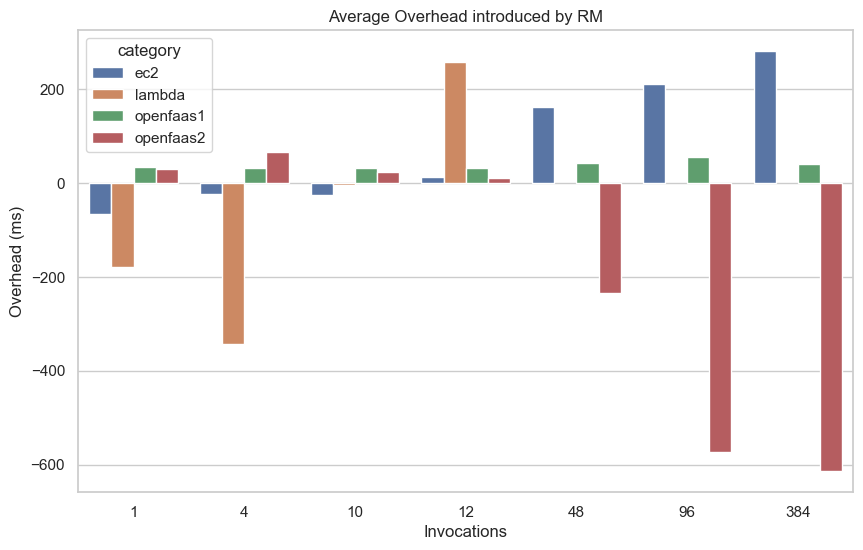

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(x='invocations', y='mean_diff', hue='category', data=means_df)
plt.title('Average Overhead introduced by RM')
plt.xlabel('Invocations')
plt.ylabel('Overhead (ms)')
plt.legend(title='category')
plt.show()

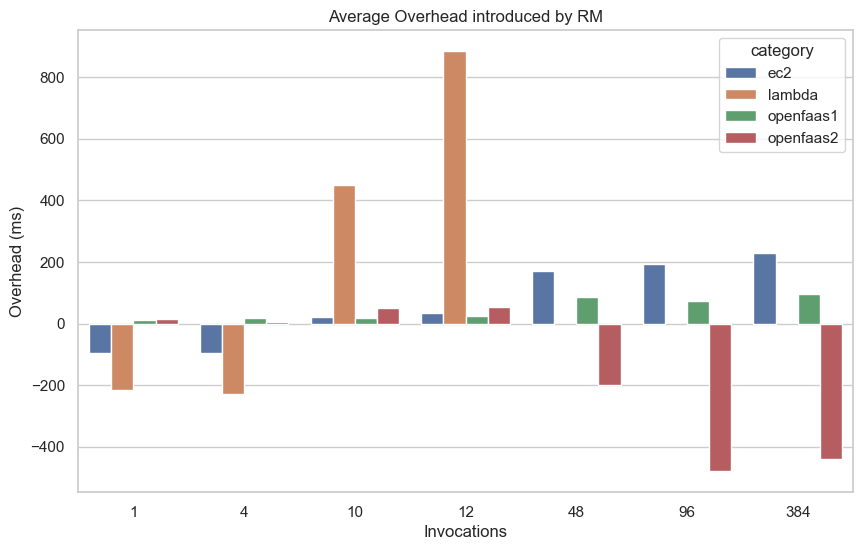

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(x='invocations', y='median_diff', hue='category', data=means_df)
plt.title('Average Overhead introduced by RM')
plt.xlabel('Invocations')
plt.ylabel('Overhead (ms)')
plt.legend(title='category')
plt.show()

In [141]:
fi_rtt = []
fi_dir = os.path.join(data_dir, "function_invocation")
all_df = pd.DataFrame()
for file_path in glob.glob(fi_dir + "/*.csv"):
       df = pd.read_csv(file_path)
       filename = os.path.basename(file_path)
       parts = filename.split('_')
       category = parts[1]
       invocations = parts[2].split('.')[0]
       df['category'] = category
       df['invocations'] = int(invocations)
       df = df.groupby(['test-run', 'type', 'category', 'invocations']).mean().reset_index()
       df['rm_mean'] = df[df['type'] == 'rm']["round trip time (ms)"].mean()
       df['rm_median']  = df[df['type'] == 'rm']["round trip time (ms)"].median()
       df['mean_diff'] = df['round trip time (ms)'] - df['rm_mean']
       all_df = pd.concat([all_df, df], ignore_index=True)
all_df

,test-run,type,category,invocations,round trip time (ms),rm_mean,rm_median,mean_diff
0,0,direct,ec2,1,1244.311810,1180.599022,1147.382498,63.712788
1,0,rm,ec2,1,1265.425205,1180.599022,1147.382498,84.826183
2,1,direct,ec2,1,1243.722439,1180.599022,1147.382498,63.123417
3,1,rm,ec2,1,1147.579432,1180.599022,1147.382498,-33.019590
4,2,direct,ec2,1,1244.816065,1180.599022,1147.382498,64.217043
...,...,...,...,...,...,...,...,...
495,7,rm,openfaas2,96,13037.439155,13056.742947,13044.749041,-19.303792
496,8,direct,openfaas2,96,13772.533735,13056.742947,13044.749041,715.790788
497,8,rm,openfaas2,96,12996.267642,13056.742947,13044.749041,-60.475305
498,9,direct,openfaas2,96,13574.827462,13056.742947,13044.749041,518.084515


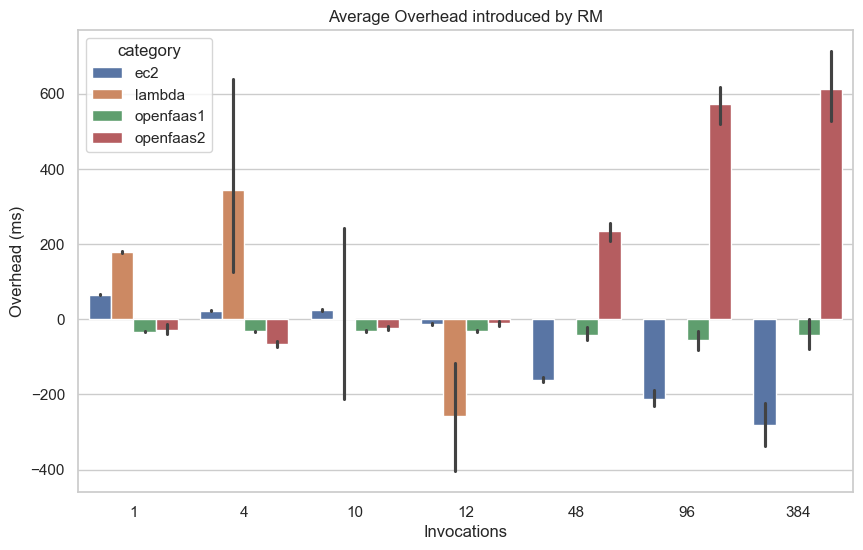

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x='invocations', y='mean_diff', hue='category', data=all_df[all_df['type'] == 'direct'])
plt.title('Average Overhead introduced by RM')
plt.xlabel('Invocations')
plt.ylabel('Overhead (ms)')
plt.legend(title='category')
plt.show()